# Plot Figures for MIGHT/CoMIGHT

Here, we load previously saved results and plot the results.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
from collections import defaultdict

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

seed = 12345
rng = np.random.default_rng(seed)

# Plot results with confounder Y <- X1 -> X2

Here, we can either permute X1, or permute X2. We vary X2 and increase the dimensionality.

## Performance of partial-AUC

In [101]:
# Plot pvalue figure
df = pd.read_csv(
    "./partial-auc-performance-results/cv_partial_auc_mv_vs_rf_linear_transform.csv",
    index_col=0,
)
df["model"] = df["model"].map({"rf": "RF", "mvrf": "MVRF"})
df.rename(
    {"n_features_2": "n_features", "model": "Base Tree Model"}, inplace=True, axis=1
)

print(df.columns)
display(df.head())
# melt the dataframe, to make it easier to plot
# df = pd.melt(
#     df,
#     id_vars=["n_features", "n_samples"],
#     var_name="model",
#     value_name="score",
# )

Index(['n_features', 'noise_dims', 'n_samples', 'Base Tree Model', 'score'], dtype='object')


,n_features,noise_dims,n_samples,Base Tree Model,score
0,0,80,500,RF,0.786667
1,800,80,500,RF,0.671579
2,1800,80,500,RF,0.640702
3,2800,80,500,RF,0.653333
4,3800,80,500,RF,0.625263


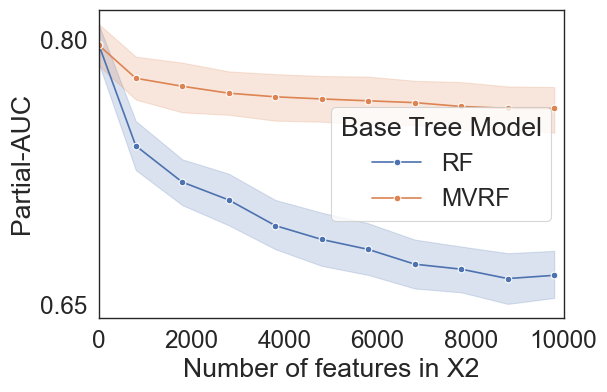

In [102]:
sns.set_context("paper", font_scale=2.0)
fig, ax = plt.subplots(figsize=(6, 4))

sns.lineplot(
    data=df, x="n_features", y="score", marker="o", hue="Base Tree Model", ax=ax
)
ax.set(
    yticks=[0.65, 0.8],
    xlim=[0, 10_000],
    ylabel="Partial-AUC",
    xlabel="Number of features in X2",
)
plt.show()

In [103]:
df1 = df

## Plot shuffling X2, where null hypothesis is true

In [104]:
# Plot pvalue figure
df = pd.read_csv(
    "./mi-pvalue-results/cv_pvalues_cmi_shuffleX2_mv_vs_rf_directindirecteffects_model.csv",
    index_col=0,
)

print(df.columns)
df.drop("rf", axis=1, inplace=True)
df.drop("mvrf", axis=1, inplace=True)
print(df.columns)
# melt the dataframe, to make it easier to plot
df = pd.melt(
    df,
    id_vars=["n_features", "n_samples"],
    var_name="model",
    value_name="score",
)

Index(['rf', 'mvrf', 'rf_pvalue', 'mvrf_pvalue', 'n_samples', 'n_features'], dtype='object')
Index(['rf_pvalue', 'mvrf_pvalue', 'n_samples', 'n_features'], dtype='object')


In [105]:
df["model"] = df["model"].map({"rf_pvalue": "RF", "mvrf_pvalue": "MVRF"})

In [106]:
df.rename({"model": "Base Tree Model"}, axis=1, inplace=True)

display(df)

,n_features,n_samples,Base Tree Model,score
0,0,500,RF,0.550450
1,800,500,RF,0.538462
2,1800,500,RF,0.464535
3,2800,500,RF,0.503497
4,3800,500,RF,0.788212
...,...,...,...,...
1095,5800,500,MVRF,0.579421
1096,6800,500,MVRF,0.214785
1097,7800,500,MVRF,0.208791
1098,8800,500,MVRF,0.124875


In [107]:
df["reject"] = df["score"] < 0.05

display(df.head())
print(df.shape)

,n_features,n_samples,Base Tree Model,score,reject
0,0,500,RF,0.550450,False
1,800,500,RF,0.538462,False
2,1800,500,RF,0.464535,False
3,2800,500,RF,0.503497,False
4,3800,500,RF,0.788212,False


(1100, 5)


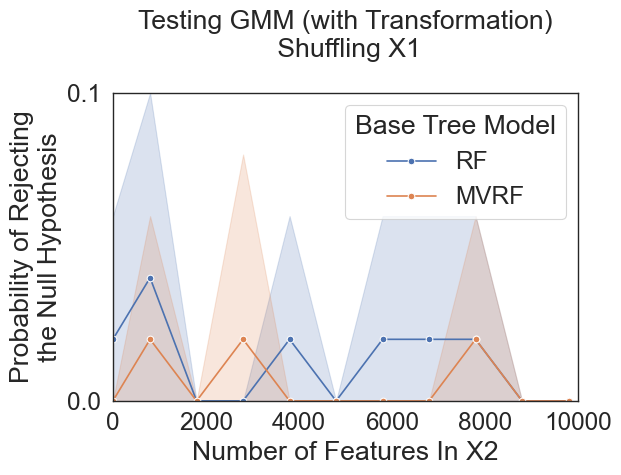

In [108]:
# Create a probability plot for rejecting the null hypothesis
sns.set_context("paper", font_scale=2.0)
fig, ax = plt.subplots(figsize=(6, 4))

# Assuming 'base tree model' is the column with the model names
sns.lineplot(
    x="n_features", y="reject", hue="Base Tree Model", data=df, marker="o", ax=ax
)

# Customize the plot
ax.set(
    title="Testing GMM (with Transformation)\n Shuffling X1\n",
    xlabel="Number of Features In X2",
    ylabel="Probability of Rejecting\nthe Null Hypothesis",
    yticks=[0.0, 0.1],
    ylim=[0.0, 0.1],
    xlim=[0, 10_000],
)
# plt.legend(title="Base Tree Model", loc="upper right")
# plt.ylim([0, 1])
plt.show()

In [109]:
df2 = df

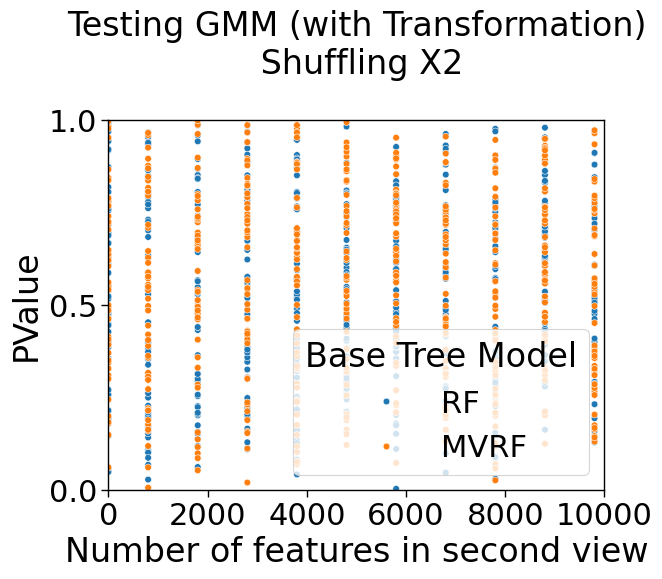

In [36]:
sns.set_context("paper", font_scale=2.5)
fig, ax = plt.subplots()
sns.scatterplot(
    data=df, x="n_features", y="score", marker="o", hue="Base Tree Model", ax=ax
)

ax.set_ylabel("PValue")
ax.set_xlabel("Number of features in second view")
ax.set_title("Testing GMM (with Transformation)\n Shuffling X2\n")
ax.set(ylim=[0, 1], yticks=[0, 0.5, 1], xlim=[0, 10_000])
plt.show()

## Now shuffling X1, where the alternative hypothesis is true

In [110]:
# Plot pvalue figure
df = pd.read_csv(
    "./mi-pvalue-results/cv_pvalues_cmi_shuffleX1_mv_vs_rf_directindirecteffects_model.csv",
    index_col=0,
)

print(df.columns)
df.drop("rf", axis=1, inplace=True)
df.drop("mvrf", axis=1, inplace=True)
print(df.columns)
# melt the dataframe, to make it easier to plot
df = pd.melt(
    df,
    id_vars=["n_features", "n_samples"],
    var_name="model",
    value_name="score",
)

Index(['rf', 'mvrf', 'rf_pvalue', 'mvrf_pvalue', 'n_samples', 'n_features'], dtype='object')
Index(['rf_pvalue', 'mvrf_pvalue', 'n_samples', 'n_features'], dtype='object')


In [111]:
df["model"] = df["model"].map({"rf_pvalue": "RF", "mvrf_pvalue": "MVRF"})

In [112]:
df.rename({"model": "Base Tree Model"}, axis=1, inplace=True)

display(df)

,n_features,n_samples,Base Tree Model,score
0,0,500,RF,0.000999
1,800,500,RF,0.000999
2,1800,500,RF,0.000999
3,2800,500,RF,0.000999
4,3800,500,RF,0.000999
...,...,...,...,...
2195,5800,500,MVRF,0.767233
2196,6800,500,MVRF,0.502498
2197,7800,500,MVRF,0.658342
2198,8800,500,MVRF,0.739261


In [113]:
df["reject"] = df["score"] < 0.05

display(df.head())
print(df.shape)

,n_features,n_samples,Base Tree Model,score,reject
0,0,500,RF,0.000999,True
1,800,500,RF,0.000999,True
2,1800,500,RF,0.000999,True
3,2800,500,RF,0.000999,True
4,3800,500,RF,0.000999,True


(2200, 5)


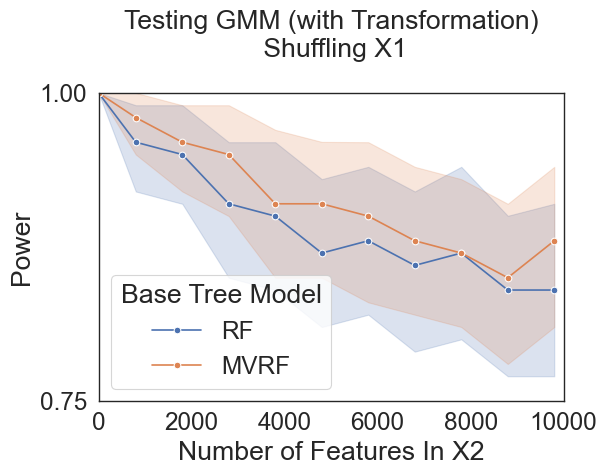

In [114]:
# Create a probability plot for rejecting the null hypothesis
sns.set_context("paper", font_scale=2.0)
fig, ax = plt.subplots(figsize=(6, 4))

# Assuming 'base tree model' is the column with the model names
sns.lineplot(
    x="n_features", y="reject", hue="Base Tree Model", data=df, marker="o", ax=ax
)

# Customize the plot
ax.set(
    title="Testing GMM (with Transformation)\n Shuffling X1\n",
    xlabel="Number of Features In X2",
    ylabel="Power",
    yticks=[0.75, 1.0],
    ylim=[0.75, 1.0],
    xlim=[0, 10_000],
)
# plt.legend(title="Base Tree Model", loc="upper right")
# plt.ylim([0, 1])
plt.show()

In [115]:
df3 = df

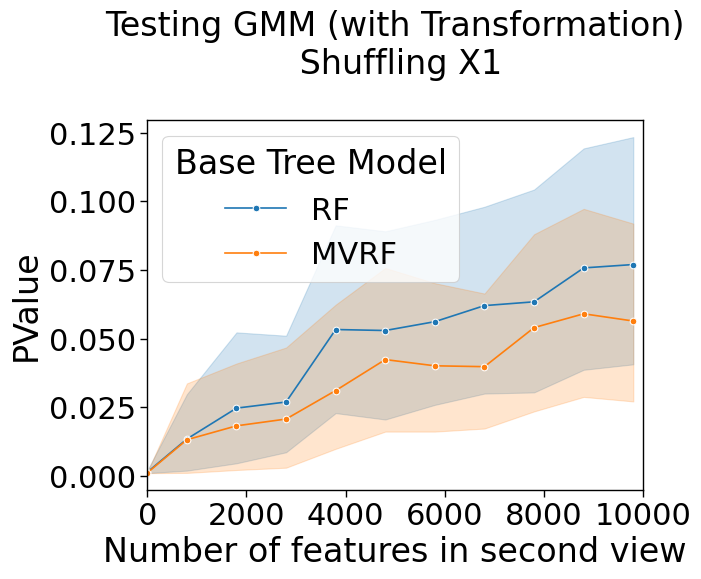

In [41]:
sns.set_context("paper", font_scale=2.5)
fig, ax = plt.subplots()
sns.lineplot(
    data=df, x="n_features", y="score", marker="o", hue="Base Tree Model", ax=ax
)

ax.set_ylabel("PValue")
ax.set_xlabel("Number of features in second view")
ax.set_title("Testing GMM (with Transformation)\n Shuffling X1\n")
ax.set(
    # ylim=[0, 1], yticks=[0, 0.5, 1],
    xlim=[0, 10_000]
)
plt.show()

## Joint Plot

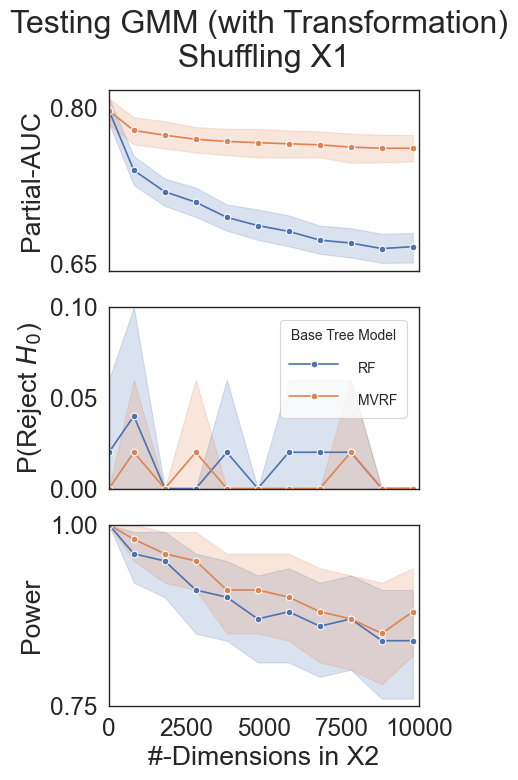

In [143]:
# Create a probability plot for rejecting the null hypothesis
sns.set_context("paper", font_scale=2.0)
fig, axs = plt.subplots(3, 1, sharex=True, squeeze=True, figsize=(4, 8))

ax = axs[0]
df = df1
sns.lineplot(
    data=df,
    x="n_features",
    y="score",
    marker="o",
    hue="Base Tree Model",
    ax=ax,
    legend=None,
)
ax.set(
    yticks=[0.65, 0.8],
    xlim=[0, 10_000],
    ylabel="Partial-AUC",
    xlabel="Number of features in X2",
)

ax = axs[1]
df = df2
# Assuming 'base tree model' is the column with the model names
gfg = sns.lineplot(
    x="n_features",
    y="reject",
    hue="Base Tree Model",
    data=df,
    marker="o",
    ax=ax,
    # legend=None,
)

# Customize the plot
ax.set(
    xlabel="Number of Features In X2",
    ylabel="P(Reject $H_0$)",
    yticks=[0.0, 0.05, 0.1],
    ylim=[0.0, 0.1],
    xlim=[0, 10_000],
)
# for legend text
plt.setp(gfg.get_legend().get_texts(), fontsize="10")

# for legend title
plt.setp(gfg.get_legend().get_title(), fontsize="10")


ax = axs[2]
df = df3
# Assuming 'base tree model' is the column with the model names
gfg = sns.lineplot(
    x="n_features",
    y="reject",
    hue="Base Tree Model",
    data=df,
    marker="o",
    ax=ax,
    legend=None,
)

# Customize the plot
ax.set(
    xlabel="#-Dimensions in X2",
    ylabel="Power",
    yticks=[0.75, 1.0],
    ylim=[0.75, 1.0],
    xlim=[0, 10_000],
)

fig.suptitle("Testing GMM (with Transformation)\n Shuffling X1\n")
plt.show()

# Plot results with Mediator X1 -> X2 -> Y